# Measuring J0600 flux from LCO images

M Kenworthy // Leiden Observatory // kenworthy@strw.leidenuniv.nl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## Josch's reference stars

Ok I have uploaded the last nights data from ROAD to AAVSO.
I use as Reference star:
UCAC4 296-008893
and as check star:
UCAC4 296-009008


In [2]:
def find_min(xobj,yobj, xlist, ylist):
    'find the index of the star closest to position xobj, yobj'
    dr = (xlist-xobj)**2 + (ylist-yobj)**2
    # find min dr 
    ind = np.argmin(dr)
    print(np.sqrt(dr[ind]))
    return ind


In [8]:
from astropy.table import Table
from pathlib import Path

# output table
t = Table(data=None,names=('MJD','gmag','gmag_err','obs'),dtype=('f','f','f','str'))

for filename in Path('./').rglob('*e91.fits.fz'):

    imname = "coj1m011-fa12-20191216-0502-e91.fits.fz"
    imname = filename
    hdu1 = fits.open(imname)
    print('processing: ',imname)

    image = hdu1['SCI'].data
    mask = hdu1['BPM'].data
    phot = hdu1['CAT'].data

    imh = hdu1['SCI'].header

    epoch = imh['MJD-OBS']
    print('{:.5f} MJD'.format(epoch))

    # get the WCS for the frame

    from astropy import wcs
    # Parse the WCS keywords in the primary HDU
    w = wcs.WCS(hdu1['SCI'].header)

    # Print out the "name" of the WCS, as defined in the FITS header
    print(w.wcs.name)

        # Print out all of the settings that were parsed from the header
    w.wcs.print_contents()

    # star coords in pix
    star_crd = w.wcs_world2pix([[90.0033, -31.0076]], 0) # star
    print(star_crd)
    # RA
    #90.0033 (06:00:00.792)
    #Dec
    #-31.0076 (-31:00:27.36)
    #Epoch
    #2000

    # reference star UC4 296-009008
    refe_crd = w.wcs_world2pix([[90.1409130, -30.9974700]], 0) # 296-009008
    #print(refe_crd)

    star_arg = find_min(star_crd[0][0], star_crd[0][1], phot['x'], phot['y'])
    #print(star_arg)
    refe_arg = find_min(refe_crd[0][0], refe_crd[0][1], phot['x'], phot['y'])
    #print(refe_arg)

    targflux = phot['flux'][star_arg]
    targfluxerr = phot['fluxerr'][star_arg]
    refflux = phot['flux'][refe_arg]
    reffluxerr = phot['fluxerr'][refe_arg]

    print('star flux is {:.1f} +- {:.1f}'.format(targflux, targfluxerr))
    print('refe flux is {:.1f} +- {:.1f}'.format(refflux, reffluxerr))

    dm = -2.5 * np.log10(targflux/refflux)
    dmerr = np.sqrt( (targfluxerr/targflux)**2 + (reffluxerr/refflux)**2) * dm
    print()
    print('delta mag is {:.3f}+-{:.3f} mag'.format(dm, dmerr))
    t.add_row([epoch,dm,dmerr,'HMB'])
    
t.sort('MJD')


processing:  lsc1m004-fa03-20191216-0075-e91.fits.fz
58834.06292 MJD

[[2018.08512205 2065.00646529]]
5.074358111112905
4.987253227128388
star flux is 263702.0 +- 544.3
refe flux is 1072300.5 +- 1052.7

delta mag is 1.523+-0.003 mag
processing:  cpt1m012-fa06-20191222-0062-e91.fits.fz
58839.80877 MJD

[[2062.20562891 2044.50694742]]
4.503931450814933
4.575076124193507
star flux is 169838.5 +- 427.1
refe flux is 707771.8 +- 850.0

delta mag is 1.550+-0.004 mag
processing:  cpt1m010-fa16-20191225-0170-e91.fits.fz
58843.02877 MJD

[[1995.74665841 2093.09016247]]
4.313159262494235
4.382367291559151
star flux is 176956.5 +- 467.5
refe flux is 653692.6 +- 834.4

delta mag is 1.419+-0.004 mag
processing:  coj1m011-fa12-20191217-0101-e91.fits.fz
58834.48053 MJD

[[2033.15923562 2017.5486693 ]]
7.351764890156272
8.349392940492931
star flux is 32219.4 +- 233.5
refe flux is 126830.4 +- 388.8

delta mag is 1.488+-0.012 mag
processing:  coj1m011-fa12-20191226-0041-e91.fits.fz
58843.46098 MJD

[[205

58839.88850 MJD

[[2003.57040184 2024.09142676]]
4.156352397866974
4.3579406499642985
star flux is 158636.2 +- 420.1
refe flux is 671419.0 +- 831.5

delta mag is 1.566+-0.005 mag
processing:  cpt1m012-fa06-20191224-0053-e91.fits.fz
58841.79400 MJD

[[2145.24977314 2481.44787732]]
4.346554014752155
4.487743217145441
star flux is 177211.4 +- 455.0
refe flux is 719914.8 +- 867.0

delta mag is 1.522+-0.004 mag
processing:  cpt1m013-fa14-20191223-0107-e91.fits.fz
58840.97166 MJD

[[2011.31255049 2022.7525076 ]]
4.226236615830027
4.497431207767089
star flux is 160766.1 +- 426.0
refe flux is 676760.4 +- 836.5

delta mag is 1.561+-0.005 mag
processing:  coj1m011-fa12-20191218-0121-e91.fits.fz
58835.53397 MJD

[[2055.1529109  2033.53293011]]
4.16432570100765
4.317101929052097
star flux is 96867.6 +- 338.2
refe flux is 401824.2 +- 648.3

delta mag is 1.545+-0.006 mag
processing:  lsc1m004-fa03-20191216-0242-e91.fits.fz
58834.31278 MJD

[[2044.20647061 2051.91029319]]
4.846895369619181
4.98546195

In [9]:
t.show_in_notebook()


idx,MJD,gmag,gmag_err,obs
0,58833.703,1.5483392,0.011168719,H
1,58833.785,1.5650146,0.004926161,H
2,58833.895,1.5674055,0.0032656505,H
3,58833.98,1.5756489,0.0034239804,H
4,58834.062,1.5230076,0.0034809678,H
5,58834.312,1.5363892,0.0037496837,H
6,58834.316,1.5439526,0.0038415645,H
7,58834.434,1.5277326,0.004383284,H
8,58834.48,1.4877633,0.011707869,H
9,58834.867,0.7210222,0.023758342,H


Text(0.5, 1.0, 'LCO g data (E. Gomez and M. Kenworthy)')

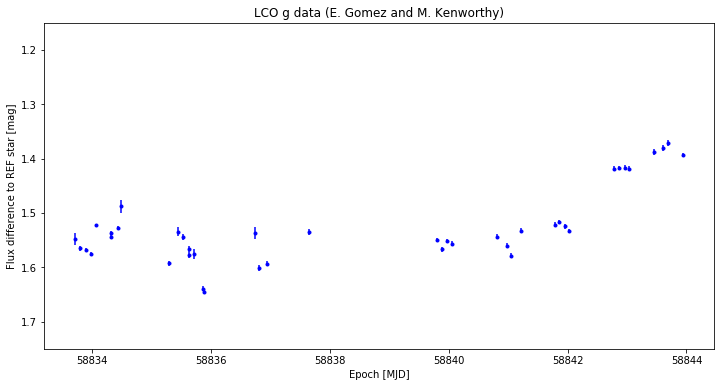

In [10]:
f = plt.figure(figsize=(12,6))
ax = f.add_subplot(111)

ax.ticklabel_format(useOffset=False)

plt.errorbar(t['MJD'], t['gmag'],yerr=t['gmag_err'], fmt='.',color='blue')
plt.ylim(1.75,1.15)
plt.xlabel('Epoch [MJD]')
plt.ylabel('Flux difference to REF star [mag]')
plt.title('LCO g data (E. Gomez and M. Kenworthy)')


In [11]:
from astropy.io import ascii

t.write('lco.ecsv', format='ascii.ecsv', overwrite=True)